**Introduction **

Are you interested on:
1. Which YouTube channel have most viewers, subscribers, video uploads etc?
2. Does more video upload gives out the more video views and more subscribers?
3. Does more subscriber gives more video views?
4. Is there a way to predict the number of subscribers based on the number of video uploaded by the channel and number of video views on it? 

Then, here I have tried to answer some of those questions using some visual tools and some analytical tools. 

In [42]:
import numpy as np 
import pandas as pd 

import os


In [43]:
!pwd

/Users/KaviAnu/Documents/python_data_analytics/youtube_data


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn import metrics
# import statsmodels.api as sm

In [45]:
df = pd.read_csv('youtube_data.csv')

In [46]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [47]:
df['Subscribers'].dtype

dtype('O')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [51]:
#df['Subscribers'] = df['Subscribers'].convert_objects(convert_numeric=True)
#df['Video Uploads'] = df['Video Uploads'].convert_objects(convert_numeric=True)

df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce')

In [62]:
channels = df['Channel name'].unique()


'SehatAQUA'

**Exploratory data analysis**

Here I start with plotting some bar graphs showing top 20 in each kind of classification of the channels. First three are top 20 by their ranking, where their number of viewers, subscribers and video views are presented. The second three are top 20 based on each of the group themselves. 

Text(0.5, 1.0, 'Number of subscribers of top 20 channels')

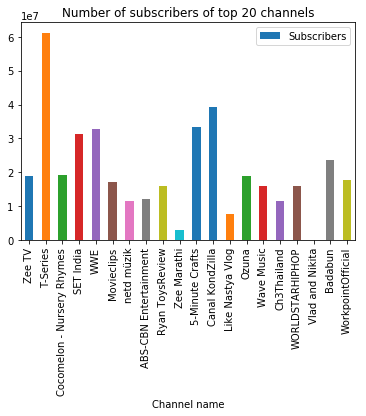

In [52]:
df.head(20).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('Number of subscribers of top 20 channels')

Text(0.5, 1.0, 'Number of video views of top 20 channels')

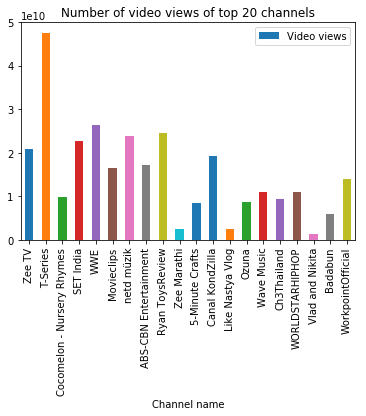

In [14]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Number of video views of top 20 channels')

Text(0.5, 1.0, 'Number of video uploads of top 20 channels')

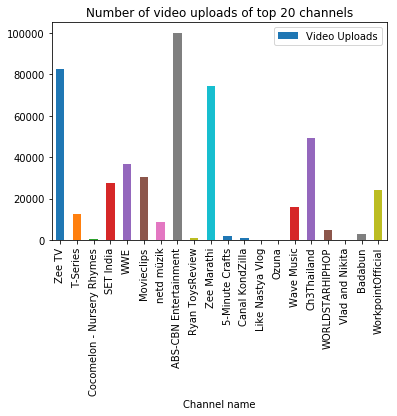

In [15]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Number of video uploads of top 20 channels')

Text(0.5, 1.0, 'Top 20 channels with maximum number of subscribers')

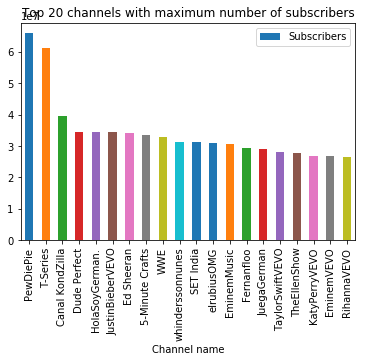

In [16]:
df.sort_values(by = ['Subscribers'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('Top 20 channels with maximum number of subscribers')

Text(0.5, 1.0, 'Top 20 channels with maximum number of video views')

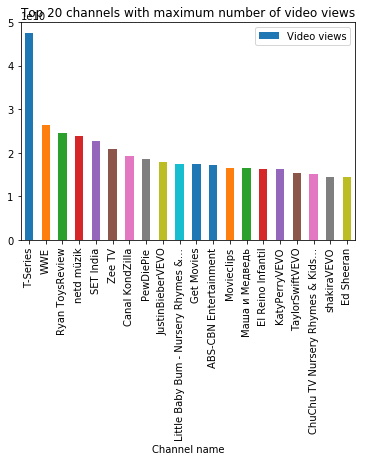

In [17]:
df.sort_values(by = ['Video views'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Top 20 channels with maximum number of video views')

Text(0.5, 1.0, 'Top 20 channels with maximum number of video uploads')

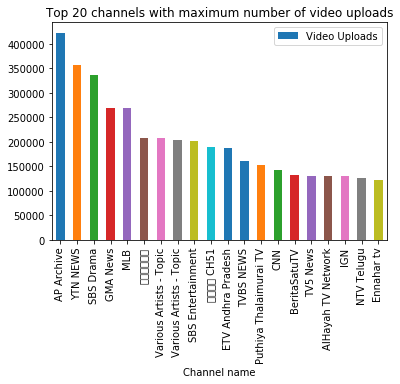

In [18]:
df.sort_values(by = ['Video Uploads'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Top 20 channels with maximum number of video uploads')

Here I am interested how all the channels in the list distribute in terms of subscribers, video uploads and subscribers going from maximum to minimum in each class. Interestingly there is huge peak at the top list and tend to gain a plateau for the other channels quickly. 

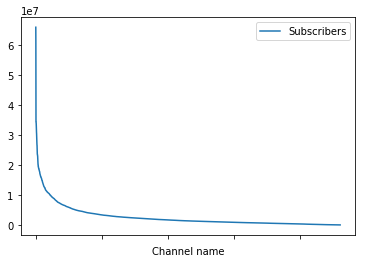

In [66]:
df.sort_values(by = ['Subscribers'], ascending = False).plot(x = 'Channel name', y = 'Subscribers')
#df.plot(x = 'Channel name', y = 'Subscribers')
#plt.xlabel('Ranking by subscribers')
#plt.ylabel('Number of subscribers')

  Rank Grade                Channel name  Video Uploads  Subscribers  \
0  1st  A++                       Zee TV        82757.0   18752951.0   
1  2nd  A++                     T-Series        12661.0   61196302.0   
2  3rd  A++   Cocomelon - Nursery Rhymes          373.0   19238251.0   
3  4th  A++                    SET India        27323.0   31180559.0   
4  5th  A++                          WWE        36756.0   32852346.0   

   Video views  
0  20869786591  
1  47548839843  
2   9793305082  
3  22675948293  
4  26273668433  


Text(0, 0.5, 'Number of video views')

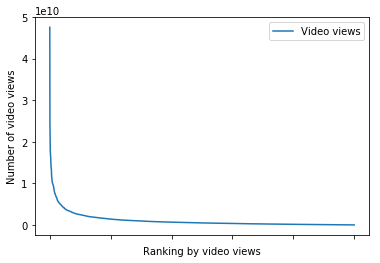

In [25]:
print(df.head())
df.sort_values(by = ['Video views'], ascending = False).plot(x = 'Channel name', y = 'Video views')
plt.xlabel('Ranking by video views')
plt.ylabel('Number of video views')

Text(0, 0.5, 'Number of video uploads')

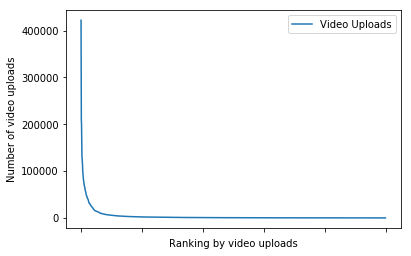

In [26]:
df.sort_values(by = ['Video Uploads'], ascending = False).plot(x = 'Channel name', y = 'Video Uploads')
plt.xlabel('Ranking by video uploads')
plt.ylabel('Number of video uploads')

In [68]:
set(df['Grade'])

{'A ', 'A+ ', 'A++ ', 'A- ', 'B+ ', '\xa0 '}

**Analysing by channel grades**

In [69]:
grade_name = list(set(df['Grade']))
grade_name

['A+ ', 'A ', 'A- ', 'A++ ', 'B+ ', '\xa0 ']

In [28]:
df_by_grade = df.set_index(df['Grade'])

count_grade = list()

for grade in grade_name:
    count_grade.append(len(df_by_grade.loc[[grade]]))

In [29]:
count_grade

[41, 963, 1024, 10, 2956, 6]

In [30]:
df_by_grade.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
Grade,,,,,,
A++,1st,A++,Zee TV,82757.0,18752951.0,20869786591
A++,2nd,A++,T-Series,12661.0,61196302.0,47548839843
A++,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
A++,4th,A++,SET India,27323.0,31180559.0,22675948293
A++,5th,A++,WWE,36756.0,32852346.0,26273668433


In [31]:
print(count_grade)
print(grade_name)

[41, 963, 1024, 10, 2956, 6]
['A+ ', 'A ', 'A- ', 'A++ ', 'B+ ', '\xa0 ']


In [32]:
grade_name[2] = 'missing'

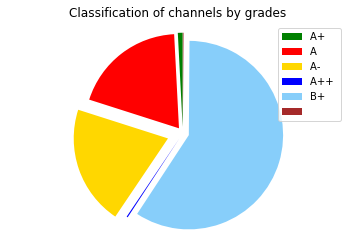

In [71]:
labels = grade_name
sizes = count_grade

explode1 = (0.2, 0.2, 0.5, 0.2, 0.2, 0.2)
color_list = ['green',  'red', 'gold', 'blue', 'lightskyblue', 'brown']

patches, texts = plt.pie(sizes, colors = color_list, explode = explode1, 
                         shadow = False, startangle = 90, radius = 3)
plt.legend(patches, labels, loc = "best")
plt.axis('equal')
plt.title('Classification of channels by grades')
plt.show()

In [72]:
df.describe()

,Video Uploads,Subscribers,Video views
count,4994.000000,4.613000e+03,5.000000e+03
mean,3859.463556,2.620004e+06,1.071449e+09
std,17085.866498,3.926447e+06,2.003844e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,141.000000,6.098940e+05,1.862329e+08
50%,443.000000,1.350477e+06,4.820548e+08
75%,1501.750000,2.950056e+06,1.124368e+09
max,422326.000000,6.599531e+07,4.754884e+10


Text(0, 0.5, 'Log count')

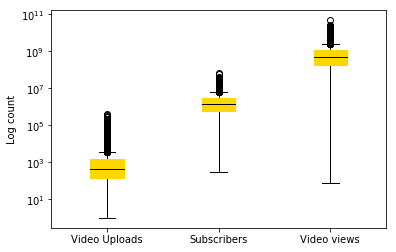

In [75]:
props = dict(boxes="gold", whiskers="Black", medians="Black", caps="Black")
df.plot.box(color=props, patch_artist=True)
#df.plot.box(patch_artist=True)

plt.yscale('log')
plt.ylabel('Log count')

The data contains non numeric values. So if the cleaned data is presented on the correlation scatter plot matrix the above mentioned conclusion about the correlation of three variables is more evident. 

In [37]:
df_clean = df.dropna()

In [78]:
df['Video Uploads'].max()

422326.0

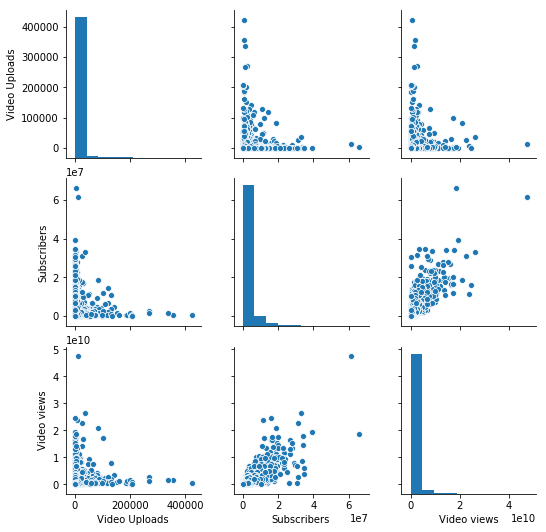

In [38]:
sns.pairplot(df_clean)

Text(0, 0.5, 'Number of channels')

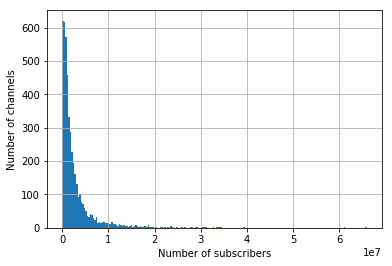

In [82]:
df['Subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')

In [ ]:
df['Video views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')

In [ ]:
df['Video Uploads'].hist(bins = 200)
plt.xlabel('Number of video uploads')
plt.ylabel('Number of channels')

**Log transformation**

In view of the positive skewness of the data, simple log transformation could be a good choice to deal with.

In [ ]:
np.log(df['Subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')

In [ ]:
np.log(df['Video views']).hist(bins = 20)
plt.xlabel('Log of number of video views')
plt.ylabel('Number of channels')

In [ ]:
np.log(df['Video Uploads']).hist(bins= 20)
plt.xlabel('Log of number of video uploads')
plt.ylabel('Number of channels')

In [83]:
df_log = pd.DataFrame()

df_log['Video_uploads_log'] = np.log(df_clean['Video Uploads'])
df_log['Video_views_log'] = np.log(df_clean['Video views'])
df_log['Subscribers_log'] = np.log(df_clean['Subscribers'])


In [84]:
df_log

,Video_uploads_log,Video_views_log,Subscribers_log
0,11.323664,23.761568,16.746862
1,9.446282,24.585023,17.929597
2,5.921578,23.004965,16.772411
3,10.215484,23.844571,17.255305
4,10.512057,23.991833,17.307534
5,10.317020,23.533758,16.657492
6,9.047821,23.897091,16.246803
7,11.514394,23.568327,16.312774
8,7.038784,23.922677,16.593269
9,11.219990,21.675630,14.859952


In [85]:
df_log.head()

,Video_uploads_log,Video_views_log,Subscribers_log
0,11.323664,23.761568,16.746862
1,9.446282,24.585023,17.929597
2,5.921578,23.004965,16.772411
3,10.215484,23.844571,17.255305
4,10.512057,23.991833,17.307534


In [86]:
df_log.tail()

,Video_uploads_log,Video_views_log,Subscribers_log
4995,6.559615,19.905015,14.544479
4996,6.680855,19.748635,13.869138
4997,4.700480,19.557739,14.998995
4998,8.153350,16.494047,10.403960
4999,5.537334,18.110242,9.960435


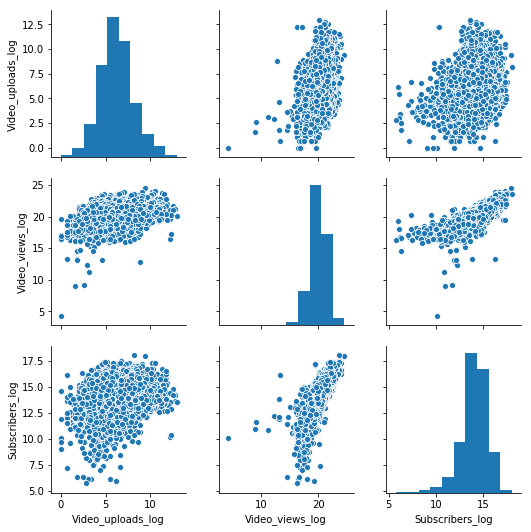

In [87]:
sns.pairplot(df_log)

In [88]:
df_log.corr()

,Video_uploads_log,Video_views_log,Subscribers_log
Video_uploads_log,1.000000,0.409871,0.243264
Video_views_log,0.409871,1.000000,0.804552
Subscribers_log,0.243264,0.804552,1.000000


**Study of correlation with log transformation**

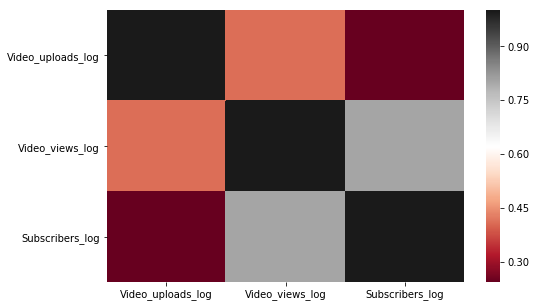

In [91]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df_log.corr(), cmap = 'RdGy')

From the above correlation plot the correlation coefficient of the variables have not been changed after the log transformation. At least the positive correlation remains the positive and vice versa. 

But if we look at the scatter plot below, visually the negative correlation between video uploads and subscribers seem to have gone. This is the effect of log transformation which is not to be confued thinking they have positive correlations.

In [ ]:
sns.pairplot(df_log)

**Linear model with log transformation**

In [ ]:
X2 = df_log[['Video_uploads_log', 'Video_views_log']]
Y2 = df_log[['Subscribers_log']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

In [ ]:
predictions2 = lm2.predict(X2_test)

In [ ]:
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

In [ ]:
sns.residplot(y2_test, predictions2,  color="g")
plt.ylabel('d')
plt.xlabel('instances')
plt.title('standardized residual plot')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

In [ ]:
coefficients2 = pd.DataFrame(X2.columns)
coefficients2['coefficients']=lm2.coef_[0]
coefficients2

In [ ]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)

In [ ]:
model2.summary()

**Comparing the result with and without log transformation**

Without using log: 

Y = a X_1  + b X_2 + c 

With log 

ln(Y) = p ln(X_1) + q ln(X_2) + r

From the later 

Y = exp( p .... ) = X_1 ^ p + X_2 ^ q + e^r 

In the following, the prediction made by the log transformation is compared with the one done directly.  The relation is mentioned in above shell.

In [ ]:
p = coefficients2['coefficients'][0]
q = coefficients2['coefficients'][1]

In [ ]:
def pred_from_log(x, y):
    return x ** p + y ** q

In [ ]:
X_test.head()

In [ ]:
vid_upl_test = np.array(X_test['Video Uploads'])
vid_viw_test = np.array(X_test['Video views'])

In [ ]:
prediction_log = pred_from_log(vid_upl_test, vid_viw_test)

It is nice that both predictions are highly correleted.

In [ ]:
plt.scatter(predictions, prediction_log, color = 'r', alpha = 0.5)
plt.xlabel('prediction without log transformation')
plt.ylabel('prediction with log transformation')

The direct plot of the difference shows that log transformation tend to predict higher value than that without log if anything. There is no way it can predict lower though. 

In [ ]:
plt.scatter(range(len(X_test)), predictions - prediction_log, color = 'red', alpha = 0.5)
plt.xlabel('count of test data')
plt.ylabel('difference of prediction with and without log')

**Conclusion**

Conclusion of the study is the following:
* The number of subscribers is proportional to the number of views. 
* The number of subscribers in negatively correlated witht the number of video uploads by the channel. 
* Linear model was tested for prediction of number of subscriber as a function of number of video uploads and number of video views.
*  Log transformation on the linear model gives the one sided biased prediction in comparison to the one without such transformation. 
